In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload file pertama: Suhu DS1
print("Upload file: Suhu DS1")
uploaded = files.upload()
filename1 = list(uploaded.keys())[0]
suhu_ds1 = pd.read_csv(filename1, sep=';', header=0)
suhu_ds1.columns = suhu_ds1.columns.str.strip()

# Upload file kedua: Suhu DS2
print("\nUpload file: Suhu DS2")
uploaded = files.upload()
filename2 = list(uploaded.keys())[0]
suhu_ds2 = pd.read_csv(filename2, sep=';', header=0)
suhu_ds2.columns = suhu_ds2.columns.str.strip()

# Upload file ketiga: Suhu DS3
print("\nUpload file: Suhu DS3")
uploaded = files.upload()
filename3 = list(uploaded.keys())[0]
suhu_ds3 = pd.read_csv(filename3, sep=';', header=0)
suhu_ds3.columns = suhu_ds3.columns.str.strip()

# Upload file keempat: Suhu DS4 (suhu lingkungan)
print("\nUpload file: Suhu DS4")
uploaded = files.upload()
filename4 = list(uploaded.keys())[0]
suhu_ds4 = pd.read_csv(filename4, sep=';', header=0)
suhu_ds4.columns = suhu_ds4.columns.str.strip()


Upload file: Suhu DS1


Saving KALIBRASI_DS_1.csv to KALIBRASI_DS_1 (1).csv

Upload file: Suhu DS2


Saving KALIBRASI_DS_2.csv to KALIBRASI_DS_2 (1).csv

Upload file: Suhu DS3


Saving KALIBRASI_DS_3.csv to KALIBRASI_DS_3 (1).csv

Upload file: Suhu DS4


Saving KALIBRASI_DS_4.csv to KALIBRASI_DS_4 (1).csv


In [ ]:
# Fungsi untuk menampilkan info tiap dataframe
def tampilkan_info(df, nama):
    print(f"\n===== Data: {nama} =====")

    # Tampilkan kolom
    print("Kolom:", df.columns.tolist())

    # Ukuran data
    print(f"Total jumlah data (baris, kolom): {df.shape}")
    print(f"Total baris data: {len(df)}")

    # Tampilkan isi tiap kolom (head)
    for col in df.columns:
        print(f"\nData pada kolom '{col}':")
        print(df[col].head())

# Tampilkan informasi masing-masing dataset suhu
tampilkan_info(suhu_ds1, "Suhu DS1 (Panel 1)")
tampilkan_info(suhu_ds2, "Suhu DS2 (Panel 2)")
tampilkan_info(suhu_ds3, "Suhu DS3 (Panel 3)")
tampilkan_info(suhu_ds4, "Suhu DS4 (Suhu Lingkungan)")



===== Data: Suhu DS1 (Panel 1) =====
Kolom: ['Termometer', 'Sensor']
Total jumlah data (baris, kolom): (21, 2)
Total baris data: 21

Data pada kolom 'Termometer':
0    30
1    31
2    32
3    33
4    34
Name: Termometer, dtype: int64

Data pada kolom 'Sensor':
0    30.74
1    31.58
2    32.67
3    33.88
4    34.69
Name: Sensor, dtype: float64

===== Data: Suhu DS2 (Panel 2) =====
Kolom: ['Termometer', 'Sensor']
Total jumlah data (baris, kolom): (21, 2)
Total baris data: 21

Data pada kolom 'Termometer':
0    30
1    31
2    32
3    33
4    34
Name: Termometer, dtype: int64

Data pada kolom 'Sensor':
0    30.55
1    31.69
2    32.54
3    33.48
4    34.67
Name: Sensor, dtype: float64

===== Data: Suhu DS3 (Panel 3) =====
Kolom: ['Termometer', 'Sensor']
Total jumlah data (baris, kolom): (21, 2)
Total baris data: 21

Data pada kolom 'Termometer':
0    30
1    31
2    32
3    33
4    34
Name: Termometer, dtype: int64

Data pada kolom 'Sensor':
0    30,87
1    31,77
2    32,89
3    33,65
4 

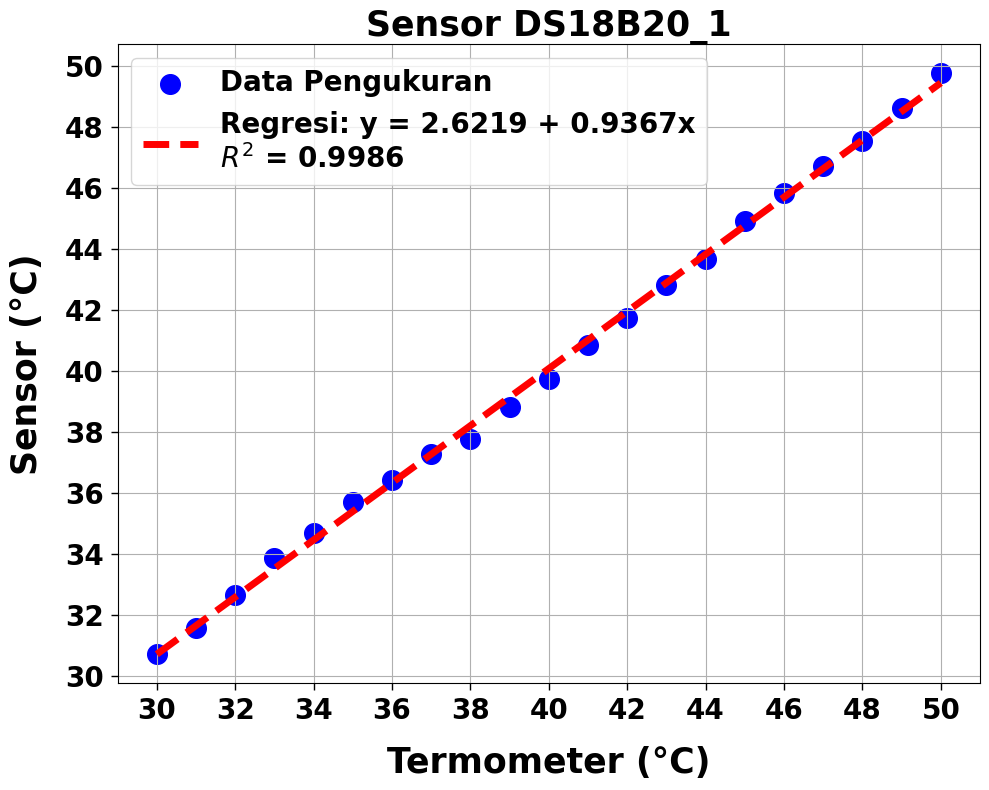

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

# Sesuaikan nama kolom suhu jika perlu
kolom_sensor = 'Sensor'        # nama kolom pada suhu_ds1
kolom_termometer = 'Termometer' # nama kolom pada suhu_ds1

# Convert the 'Sensor' column in all dataframes to numeric, replacing ',' with '.'
suhu_ds1['Sensor'] = pd.to_numeric(suhu_ds1['Sensor'].astype(str).str.replace(',', '.'), errors='coerce')
suhu_ds2['Sensor'] = pd.to_numeric(suhu_ds2['Sensor'].astype(str).str.replace(',', '.'), errors='coerce')
suhu_ds3['Sensor'] = pd.to_numeric(suhu_ds3['Sensor'].astype(str).str.replace(',', '.'), errors='coerce')
suhu_ds4['Sensor'] = pd.to_numeric(suhu_ds4['Sensor'].astype(str).str.replace(',', '.'), errors='coerce')


# Ambil data (drop NaN jika ada)
x = suhu_ds1[kolom_termometer].dropna().values.reshape(-1, 1)  # Termometer (X)
y = suhu_ds1[kolom_sensor].dropna().values.reshape(-1, 1)      # Sensor (Y)

# Ensure that x and y have the same number of samples after dropping NaNs
if len(x) != len(y):
    print("Warning: Mismatched number of non-null values in Termometer and Sensor columns for suhu_ds1. Please check your data.")
else:
    # Regresi linier
    model = LinearRegression()
    model.fit(x, y)

    # Ambil parameter regresi
    a = model.intercept_[0]
    b = model.coef_[0][0]
    r2 = r2_score(y, model.predict(x))

    # Plot hasil regresi
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, color='blue', label='Data Pengukuran', s=200)
    plt.plot(x, model.predict(x), color='red', linewidth=5, linestyle='--',
             label=f'Regresi: y = {a:.4f} + {b:.4f}x\n$R^2$ = {r2:.4f}')
    plt.xlabel('Termometer (°C)', fontsize=25, fontweight='bold', labelpad=15)
    plt.ylabel('Sensor (°C)', fontsize=25, fontweight='bold', labelpad=15)
    plt.title('Sensor DS18B20_1', fontsize=25, fontweight='bold')
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=1, length=5, pad=5)

    # Tambahkan legend dengan font bold dan besar
    bold_font = FontProperties(weight='bold', size=20)
    plt.legend(prop=bold_font, loc='upper left')

    # Set x-axis ticks
    plt.xticks(np.arange(x.min(), x.max() + 1, 2), fontsize=20, fontweight='bold')
    plt.yticks(np.arange(np.floor(y.min()), np.ceil(y.max()) + 1, 2).astype(int), fontsize=20
    , fontweight='bold')

    plt.tight_layout()
    plt.show()

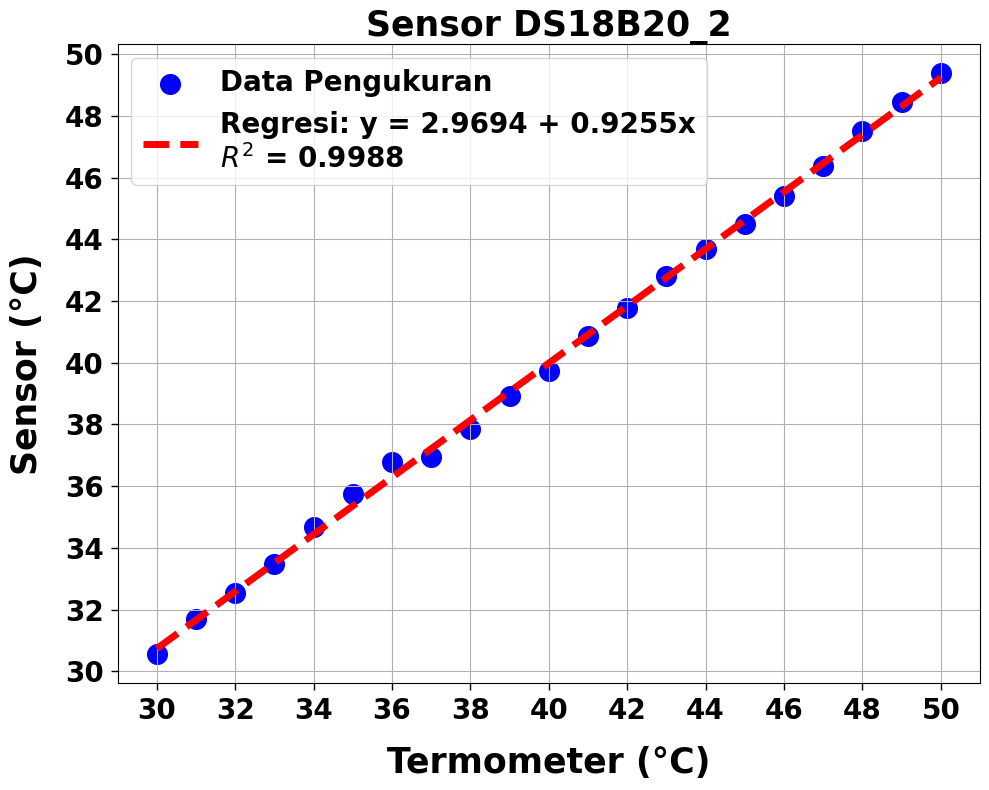

In [ ]:
# prompt: buat dengan format yang sama dengan program diatas untuk data suhu ds2

# Sesuaikan nama kolom suhu jika perlu (untuk suhu_ds2)
kolom_sensor_ds2 = 'Sensor'        # nama kolom pada suhu_ds2
kolom_termometer_ds2 = 'Termometer' # nama kolom pada suhu_ds2

# Ambil data (drop NaN jika ada) dari suhu_ds2
x_ds2 = suhu_ds2[kolom_termometer_ds2].dropna().values.reshape(-1, 1)  # Termometer (X)
y_ds2 = suhu_ds2[kolom_sensor_ds2].dropna().values.reshape(-1, 1)      # Sensor (Y)

# Ensure that x_ds2 and y_ds2 have the same number of samples after dropping NaNs
if len(x_ds2) != len(y_ds2):
    print("Warning: Mismatched number of non-null values in Termometer and Sensor columns for suhu_ds2. Please check your data.")
else:
    # Regresi linier untuk suhu_ds2
    model_ds2 = LinearRegression()
    model_ds2.fit(x_ds2, y_ds2)

    # Ambil parameter regresi untuk suhu_ds2
    a_ds2 = model_ds2.intercept_[0]
    b_ds2 = model_ds2.coef_[0][0]
    r2_ds2 = r2_score(y_ds2, model_ds2.predict(x_ds2))

    # Plot hasil regresi untuk suhu_ds2
    plt.figure(figsize=(10, 8))
    plt.scatter(x_ds2, y_ds2, color='blue', label='Data Pengukuran', s=200)
    plt.plot(x_ds2, model_ds2.predict(x_ds2), color='red', linewidth=5, linestyle='--',
             label=f'Regresi: y = {a_ds2:.4f} + {b_ds2:.4f}x\n$R^2$ = {r2_ds2:.4f}')
    plt.xlabel('Termometer (°C)', fontsize=25, fontweight='bold', labelpad=15)
    plt.ylabel('Sensor (°C)', fontsize=25, fontweight='bold', labelpad=15)
    plt.title('Sensor DS18B20_2', fontsize=25, fontweight='bold')
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=1, length=5, pad=5)

    # Tambahkan legend dengan font bold dan besar
    bold_font = FontProperties(weight='bold', size=20)
    plt.legend(prop=bold_font, loc='upper left')

    # Set x-axis ticks
    plt.xticks(np.arange(x_ds2.min(), x_ds2.max() + 1, 2), fontsize=20, fontweight='bold')
    plt.yticks(np.arange(np.floor(y_ds2.min()), np.ceil(y_ds2.max()) + 1, 2).astype(int), fontsize=20
    , fontweight='bold')

    plt.tight_layout()
    plt.show()

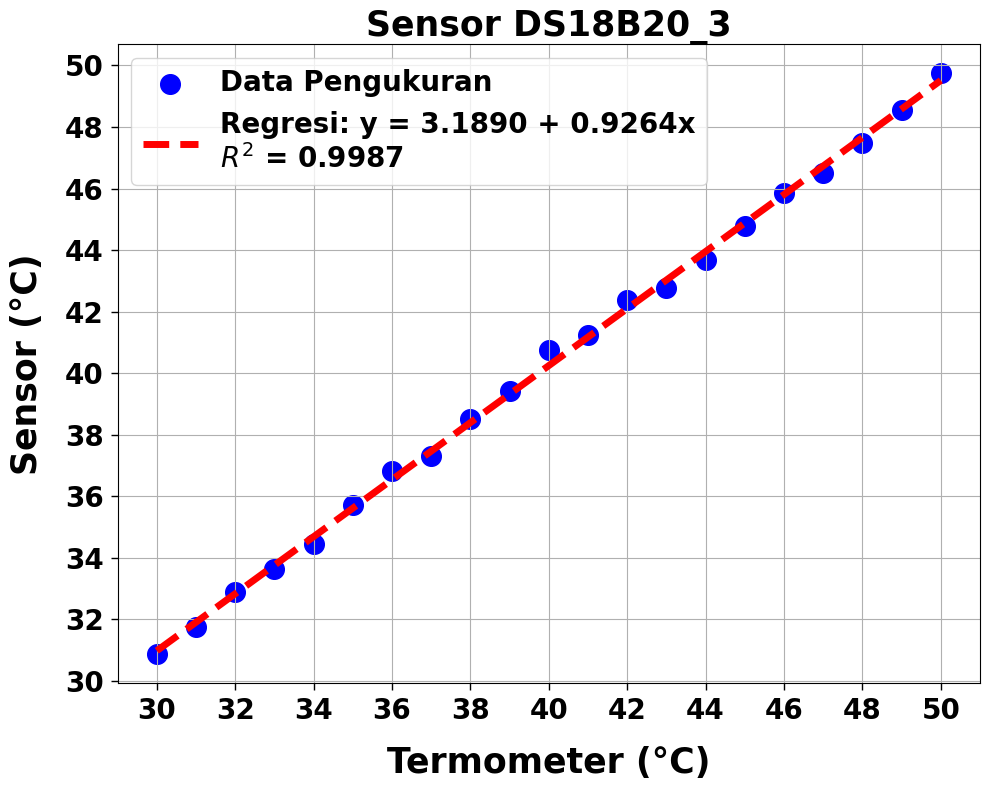

In [ ]:
# prompt: buat dengan format yang sama dengan program diatas untuk data suhu ds3

# Lakukan proses yang sama untuk suhu_ds3
kolom_sensor_ds3 = 'Sensor'
kolom_termometer_ds3 = 'Termometer'

# Ambil data suhu_ds3 (drop NaN jika ada)
x_ds3 = suhu_ds3[kolom_termometer_ds3].dropna().values.reshape(-1, 1)
y_ds3 = suhu_ds3[kolom_sensor_ds3].dropna().values.reshape(-1, 1)

# Pastikan jumlah data x dan y sama setelah dropna
if len(x_ds3) != len(y_ds3):
  print("Warning: Jumlah data non-null pada kolom Termometer dan Sensor di suhu_ds3 tidak sama. Harap periksa data Anda.")
else:
  # Regresi linier untuk suhu_ds3
  model_ds3 = LinearRegression()
  model_ds3.fit(x_ds3, y_ds3)

  # Ambil parameter regresi
  a_ds3 = model_ds3.intercept_[0]
  b_ds3 = model_ds3.coef_[0][0]
  r2_ds3 = r2_score(y_ds3, model_ds3.predict(x_ds3))

  # Plot hasil regresi untuk suhu_ds3
  plt.figure(figsize=(10, 8))
  plt.scatter(x_ds3, y_ds3, color='blue', label='Data Pengukuran', s=200)
  plt.plot(x_ds3, model_ds3.predict(x_ds3), color='red', linewidth=5, linestyle='--',
           label=f'Regresi: y = {a_ds3:.4f} + {b_ds3:.4f}x\n$R^2$ = {r2_ds3:.4f}')
  plt.xlabel('Termometer (°C)', fontsize=25, fontweight='bold', labelpad=15)
  plt.ylabel('Sensor (°C)', fontsize=25, fontweight='bold', labelpad=15)
  plt.title('Sensor DS18B20_3', fontsize=25, fontweight='bold')
  plt.grid(True)
  plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black', width=1, length=5, pad=5)

  # Tambahkan legend dengan font bold dan besar
  bold_font = FontProperties(weight='bold', size=20)
  plt.legend(prop=bold_font, loc='upper left')

  # Set x-axis ticks
  plt.xticks(np.arange(x_ds3.min(), x_ds3.max() + 1, 2), fontsize=20, fontweight='bold')
  plt.yticks(np.arange(np.floor(y_ds3.min()), np.ceil(y_ds3.max()) + 1, 2).astype(int), fontsize=20, fontweight='bold')


  plt.tight_layout()
  plt.show()